
# Linear Regression
- X-y split (y is the target variable, in this case, "total claim amount")
- Train-test split.
- Standardize the data (after the data split!) *on the training set*.
- Apply linear regression.
- Model Interpretation.
- make a dataframe to show real vs perdicted


In [1]:
import pandas as pd
import numpy as np

file = '/content/marketing_customer_analysis_clean.csv'
df = pd.read_csv(file)
df = df.dropna()

In [2]:
num = df.select_dtypes('number')
num.drop(axis=1,columns=['total_claim_amount','unnamed:_0'],inplace=True)

In [3]:
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,4809.216960,48029,61,7.000000,52,0.000000,9,2
1,2228.525238,0,64,3.000000,26,0.000000,1,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,2
3,22332.439460,49078,97,10.000000,3,0.000000,2,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,1
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,2
10908,11971.977650,64195,158,0.000000,27,4.000000,6,2


In [4]:
#splitting the data

X = num #the numericals columns, apart from 'total_claim_amount'
y = df['total_claim_amount']

In [5]:
import seaborn as sns

# Creating the model

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train) #fitting for the training data
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
model = lm.fit(X_train, y_train)

In [14]:
coef = model.coef_

In [15]:
model.intercept_

434.0622473387925

# Real vs. Predicted dataframe

In [16]:
y_pred = np.array(model.predict(X_test))

In [17]:
y_test.reset_index(drop=True)

0       340.800000
1       195.153339
2       770.400000
3       336.000000
4       561.600000
           ...    
2723    345.600000
2724    664.280864
2725    684.000000
2726     25.713622
2727    497.684017
Name: total_claim_amount, Length: 2728, dtype: float64

In [18]:
real_vs_pred = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})

In [19]:
real_vs_pred

,y_test,y_pred
1250,340.800000,359.011139
5438,195.153339,368.534973
10156,770.400000,634.413943
3441,336.000000,261.383580
682,561.600000,562.506569
...,...,...
5063,345.600000,345.189930
10053,664.280864,639.831179
3453,684.000000,577.944843
9241,25.713622,288.420724


# Model interpetation

<Axes: >

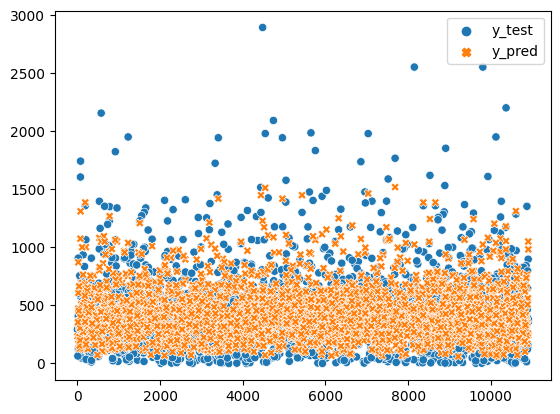

In [20]:
sns.scatterplot(real_vs_pred)

# Model Evaluation:
- MSE.
- RMSE.
- MAE.
- R2.
- Adjusted R2.


In [42]:
from sklearn.metrics import mean_squared_error as mse

In [43]:
mse(real_vs_pred['y_test'], real_vs_pred['y_pred']) # mean squared error

42443.37163762149

In [44]:
from sklearn.metrics import mean_absolute_error as mae

In [45]:
mae(real_vs_pred['y_test'], real_vs_pred['y_pred']) # mean absolute error

145.3193213837024

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) # R^2
r2

0.5333477949342573

The formula for Adjusted $R^2$ is:

$\bar{R}^2 = 1 - (1-R^2)   \frac{n-1}{n-p-1}  $

In [47]:
# adjusted R^2 TODO
adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)
adj_r2

-2.0852781242801135

## Feature Importance

In [48]:
model.coef_

array([-40.54053058, -13.93782091,  90.79422036, ...,  -2.22640368,
        -1.90036195,   0.        ])

In [49]:
feature_importance = pd.DataFrame({'variable':X.columns, 'coefficient':model.coef_})

In [50]:
feature_importance

,variable,coefficient
0,customer_lifetime_value,-4.054053e+01
1,income,-1.393782e+01
2,monthly_premium_auto,9.079422e+01
3,months_since_last_claim,-8.881784e-15
4,months_since_policy_inception,-7.890649e-01
...,...,...
9254,vehicle_class_Two-Door Car,3.523574e+00
9255,vehicle_size_Large,-1.488769e+00
9256,vehicle_size_Medsize,-2.226404e+00
9257,vehicle_size_Small,-1.900362e+00


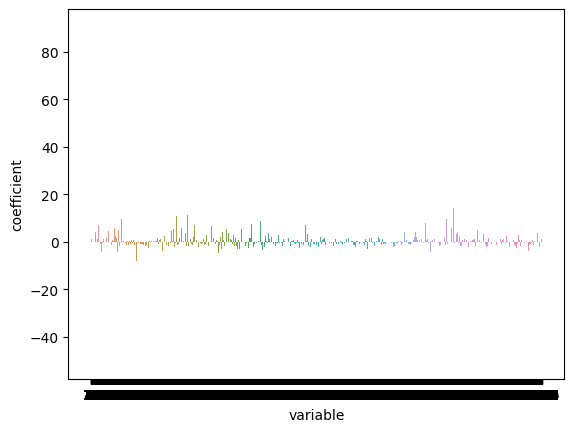

In [51]:
import matplotlib.pyplot as plt

sns.barplot(x=feature_importance['variable'], y=feature_importance['coefficient'])
plt.xticks(rotation=45)

# Model Iteration (Wednesday and Thursday)
- Rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).
- (Optional) Rerun the model after removing the outliers and compare the results using the R2.

In [31]:
from pandas.core.reshape.encoding import get_dummies
X = pd.get_dummies(df)
X.drop(axis=1,columns=['total_claim_amount','unnamed:_0'],inplace=True)
y = df['total_claim_amount']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X_train) #fitting for the training data
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [38]:
model = lm.fit(X_train, y_train)

In [41]:
model.coef_

array([-40.54053058, -13.93782091,  90.79422036, ...,  -2.22640368,
        -1.90036195,   0.        ])

In [40]:
model.intercept_

434.0622473387925

In [ ]:
#TODO remove outliers